In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import math
import warnings
warnings.filterwarnings("ignore")
from pandas.plotting import autocorrelation_plot
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import statsmodels as sm
import statsmodels.api as smt
import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import os
os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES']=""
os.environ['TF_CUDNN_USE_AUTOTUNE'] ='0'
import tensorflow as tf
import random
np.random.seed(0)
tf.random.set_seed(0)
random.seed(0)
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.models import Sequential


In [ ]:
train_data=pd.read_csv('Unemployment_Rate_train.csv')
unemployment_rate_test=pd.read_csv('Unemployment_Rate_test.csv')

In [ ]:
train_data.head()

,DATE,UnemploymentRate
0,2/1/1978,4.657080
1,3/1/1978,4.337432
2,4/1/1978,4.191995
3,5/1/1978,4.267247
4,6/1/1978,4.290661


In [ ]:
unemployment_rate_test.head()

,DATE,UnemploymentRate
0,3/1/2012,0
1,4/1/2012,0
2,5/1/2012,0
3,6/1/2012,0
4,7/1/2012,0


In [ ]:
print("Train data",np.shape(train_data))
print("Test data",np.shape(unemployment_rate_test))

Train data (409, 2)
Test data (48, 2)


In [ ]:
train_data.isna().sum()

DATE                0
UnemploymentRate    0
dtype: int64

In [ ]:
unemployment_rate_test.isna().sum()

DATE                0
UnemploymentRate    0
dtype: int64

set index

In [ ]:
train_data['DATE']=pd.to_datetime(train_data['DATE'])
train_data.set_index('DATE', inplace=True)
train_data.head()

,UnemploymentRate
DATE,
1978-02-01,4.657080
1978-03-01,4.337432
1978-04-01,4.191995
1978-05-01,4.267247
1978-06-01,4.290661


In [ ]:
unemployment_rate_test['DATE']=pd.to_datetime(unemployment_rate_test['DATE'])
unemployment_rate_test.set_index('DATE', inplace=True)
unemployment_rate_test.head()

,UnemploymentRate
DATE,
2012-03-01,0
2012-04-01,0
2012-05-01,0
2012-06-01,0
2012-07-01,0


In [ ]:
print(train_data.dtypes)

UnemploymentRate    float64
dtype: object


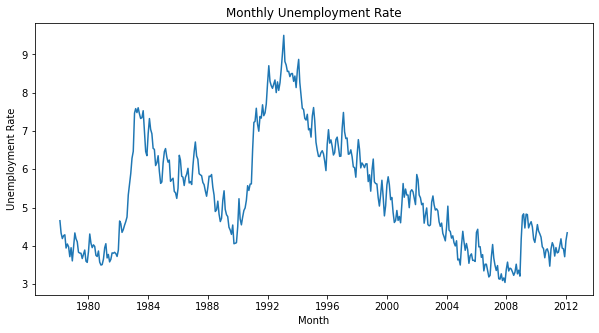

In [ ]:
time_series = train_data['UnemploymentRate']

# Plot the time series
plt.figure(figsize=(10,5))
plt.plot(time_series)
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.title("Monthly Unemployment Rate")
plt.show()

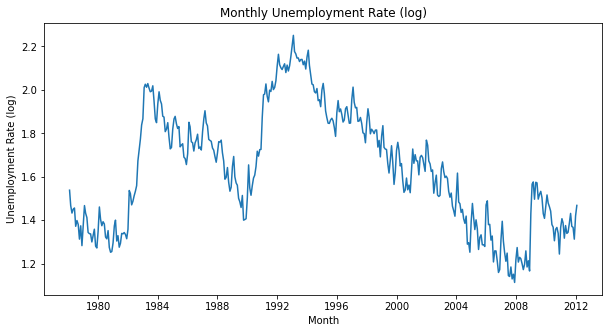

In [ ]:
time_series_log = np.log(time_series)

# Plot the time series
plt.figure(figsize=(10,5))
plt.plot(time_series_log)
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (log)')
plt.title("Monthly Unemployment Rate (log)")
plt.show()

# Triple Exponential Smoothing (Holt-Winters smoothing)

In [ ]:
# Set the frequency of the date time index as Monthly start as indicated by the data
train_data.index.freq = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
y = time_series['1978-03-01':'2012-02-01']
alpha = 1/(2*m)

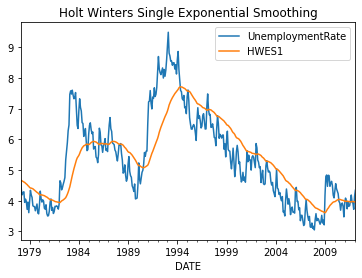

In [ ]:
train_data['HWES1'] = SimpleExpSmoothing(train_data['UnemploymentRate']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
train_data[['UnemploymentRate','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

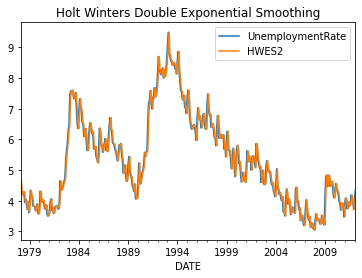

In [ ]:
train_data['HWES2'] = ExponentialSmoothing(train_data['UnemploymentRate'],trend='add').fit().fittedvalues
train_data[['UnemploymentRate','HWES2']].plot(title='Holt Winters Double Exponential Smoothing');

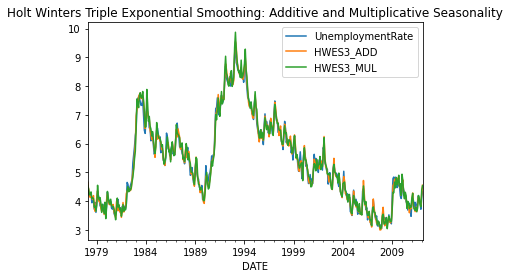

In [ ]:
train_data['HWES3_ADD'] = ExponentialSmoothing(train_data['UnemploymentRate'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
train_data['HWES3_MUL'] = ExponentialSmoothing(train_data['UnemploymentRate'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
train_data[['UnemploymentRate','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')

reference:https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873

Text(0.5, 1.0, ' ')

<Figure size 1080x576 with 0 Axes>

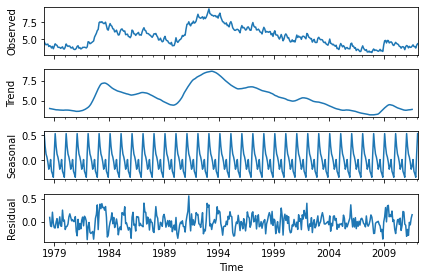

In [ ]:
#decomposition 
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = smt.tsa.seasonal_decompose(time_series,model = 'additive')
plt.figure(figsize=(15,8))
decompose.plot()
plt.xlabel('Time')
plt.ylabel('Residual')
plt.title(' ')

Text(0.5, 1.0, ' ')

<Figure size 1080x576 with 0 Axes>

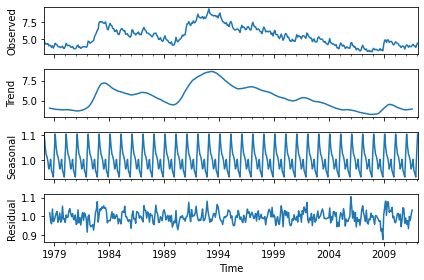

In [ ]:
#decomposition 
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = smt.tsa.seasonal_decompose(time_series,model = 'multiplicative')
plt.figure(figsize=(15,8))
decompose.plot()
plt.xlabel('Time')
plt.ylabel('Residual')
plt.title(' ')

In [ ]:
fit_add = ExponentialSmoothing(time_series, seasonal_periods=12, trend='add', seasonal='add').fit() # Holt-Winters additive smoothing
fit_mul = ExponentialSmoothing(time_series, seasonal_periods=12, trend='add', seasonal='mul').fit() # Holt-Winters multiplicative smoothing

In [ ]:
fit_add.params

{'damping_slope': nan,
 'initial_level': 5.851528937533077,
 'initial_seasons': array([-1.20345402, -1.45705873, -1.61315068, -1.67213339, -1.76820412,
        -1.91584172, -1.85304022, -1.71615074, -1.95127784, -2.00643046,
        -2.07687933, -1.59374725]),
 'initial_slope': 0.0,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.7719627821550843,
 'smoothing_seasonal': 0.0,
 'smoothing_slope': 0.15764841811539293,
 'use_boxcox': False}

In [ ]:
fit_mul.params

{'damping_slope': nan,
 'initial_level': 5.847253066526722,
 'initial_seasons': array([0.79398252, 0.76015116, 0.74028453, 0.73059265, 0.71788265,
        0.70095005, 0.70855248, 0.7261473 , 0.69527944, 0.68871778,
        0.68139286, 0.74352339]),
 'initial_slope': 0.0,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.7687823574832748,
 'smoothing_seasonal': 0.0,
 'smoothing_slope': 0.15207492318247437,
 'use_boxcox': False}

In [ ]:
# symbol r $ and \ in the results variable are the latex symbols for visualization in notebook
results = pd.DataFrame(index=[r"$\alpha$",\
                              r"$\beta$",\
                              r"$\gamma$",\
                              r"$l_0$",\
                              "$b_0$",\
                              "SSE"])
# ExponentialSmoothing() object has following attributes
params = ['smoothing_level', \
          'smoothing_slope', \
          'smoothing_seasonal', \
          'initial_level', \
          'initial_slope']

# check out the performance of additive and multiplicative
results["Additive"]       = [fit_add.params[p] for p in params] + [fit_add.sse]
results["Multiplicative"] = [fit_mul.params[p] for p in params] + [fit_mul.sse]
print(results)

           Additive  Multiplicative
$\alpha$   0.771963        0.768782
$\beta$    0.157648        0.152075
$\gamma$   0.000000        0.000000
$l_0$      5.851529        5.847253
$b_0$      0.000000        0.000000
SSE       14.424167       15.092550


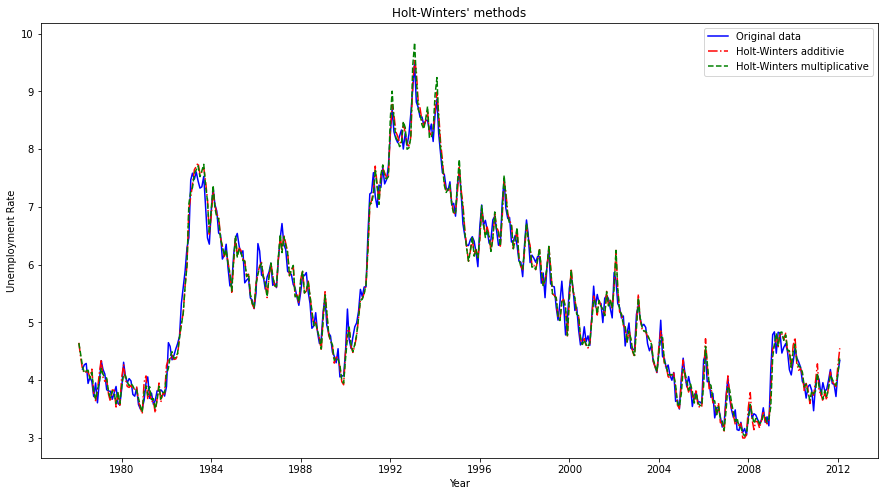

In [ ]:
# Obtain fitted values from the fittedvalues attribute
smooth_add = fit_add.fittedvalues
smooth_mul = fit_mul.fittedvalues

# Plot all together
plt.figure(figsize=(15,8))
plt.plot(y[1:], 'b-', label = 'Original data')
plt.plot(smooth_add, 'r-.',label = 'Holt-Winters additivie')
plt.plot(smooth_mul, 'g--', label = 'Holt-Winters multiplicative')
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.title("Holt-Winters' methods")
plt.legend()
plt.show()

In [ ]:
print(smooth_add)
print(y)

DATE
1978-02-01    4.648075
1978-03-01    4.402518
1978-04-01    4.189357
1978-05-01    4.125907
1978-06-01    4.149642
                ...   
2011-10-01    3.978881
2011-11-01    3.930317
2011-12-01    3.890224
2012-01-01    4.253258
2012-02-01    4.552396
Freq: MS, Length: 409, dtype: float64
DATE
1978-03-01    4.337432
1978-04-01    4.191995
1978-05-01    4.267247
1978-06-01    4.290661
1978-07-01    3.944592
                ...   
2011-10-01    3.942588
2011-11-01    3.925562
2011-12-01    3.717759
2012-01-01    4.136666
2012-02-01    4.342338
Freq: MS, Name: UnemploymentRate, Length: 408, dtype: float64


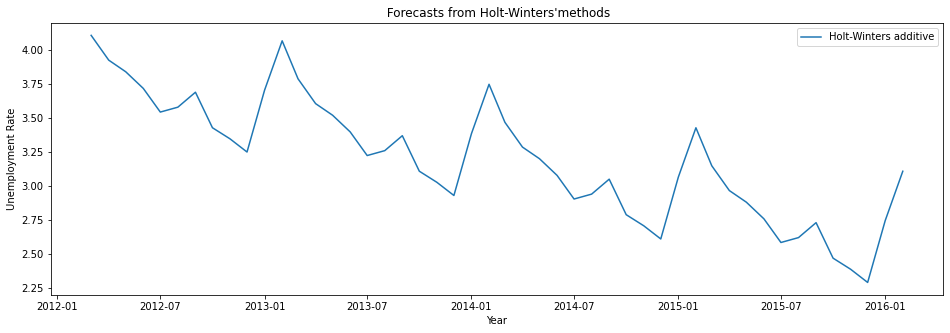

In [ ]:
# Forecast 12 more data points
y_forecast_add = fit_add.forecast(48)

# And plot al together
plt.figure(figsize=(16,5))
plt.plot(y_forecast_add, label = 'Holt-Winters additive')
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.title(" Forecasts from Holt-Winters'methods")
plt.legend()
plt.show()

In [ ]:
# MSE

In [ ]:
train_ratio_hw = 0.75
split_point_hw = round(len(time_series)*train_ratio_hw)

train_hw, test_hw = time_series[0:split_point_hw],time_series[split_point_hw:]

In [ ]:
train_hw

DATE
1978-02-01    4.657080
1978-03-01    4.337432
1978-04-01    4.191995
1978-05-01    4.267247
1978-06-01    4.290661
                ...   
2003-04-01    4.935705
2003-05-01    4.967712
2003-06-01    4.914127
2003-07-01    4.632627
2003-08-01    4.509552
Freq: MS, Name: UnemploymentRate, Length: 307, dtype: float64

In [ ]:
test_hw

DATE
2003-09-01    4.596243
2003-10-01    4.326730
2003-11-01    4.236876
2003-12-01    4.131877
2004-01-01    4.495899
                ...   
2011-10-01    3.942588
2011-11-01    3.925562
2011-12-01    3.717759
2012-01-01    4.136666
2012-02-01    4.342338
Freq: MS, Name: UnemploymentRate, Length: 102, dtype: float64

In [ ]:
fit_add_hw = ExponentialSmoothing(train_hw, seasonal_periods=12, trend='add', seasonal='add').fit() # Holt-Winters additive smoothing
fit_mul_hw = ExponentialSmoothing(train_hw, seasonal_periods=12, trend='add', seasonal='mul').fit() # Holt-Winters multiplicative smoothing

In [ ]:
# symbol r $ and \ in the results variable are the latex symbols for visualization in notebook
results_hw = pd.DataFrame(index=[r"$\alpha$",\
                              r"$\beta$",\
                              r"$\gamma$",\
                              r"$l_0$",\
                              "$b_0$",\
                              "SSE"])
# ExponentialSmoothing() object has following attributes
params_hw = ['smoothing_level', \
          'smoothing_trend', \
          'smoothing_seasonal', \
          'initial_level', \
          'initial_trend']

# check out the performance of additive and multiplicative
results_hw["Additive"]       = [fit_add_hw.params[p] for p in params] + [fit_add_hw.sse]
results_hw["Multiplicative"] = [fit_mul_hw.params[p] for p in params] + [fit_mul_hw.sse]
print(results_hw)

           Additive  Multiplicative
$\alpha$   0.756225        0.762577
$\beta$    0.174425        0.166886
$\gamma$   0.000000        0.000000
$l_0$      6.331941        6.348936
$b_0$      0.000000        0.000000
SSE       11.693843       11.952513


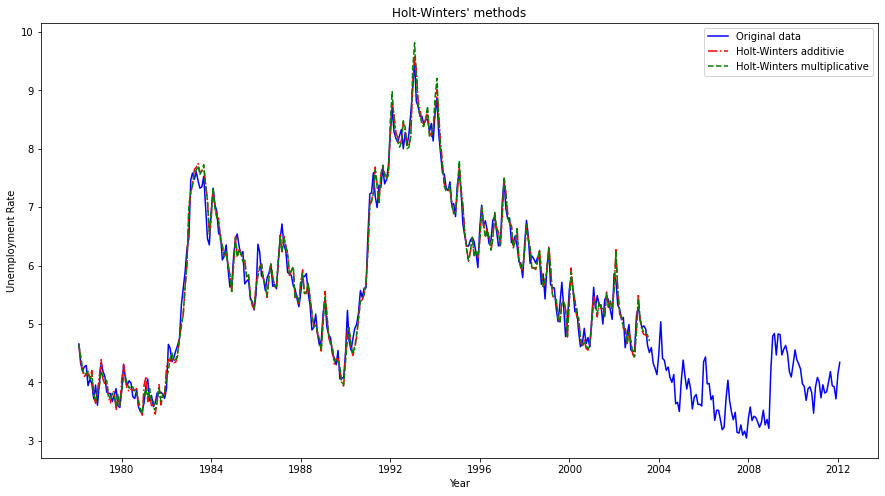

In [ ]:
# Obtain fitted values from the fittedvalues attribute
smooth_add_hw = fit_add_hw.fittedvalues
smooth_mul_hw = fit_mul_hw.fittedvalues

# Plot all together
plt.figure(figsize=(15,8))
plt.plot(time_series, 'b-', label = 'Original data')
plt.plot(smooth_add_hw, 'r-.',label = 'Holt-Winters additivie')
plt.plot(smooth_mul_hw, 'g--', label = 'Holt-Winters multiplicative')
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.title("Holt-Winters' methods")
plt.legend()
plt.show()

In [ ]:
print(smooth_add_hw)

DATE
1978-02-01    4.644372
1978-03-01    4.401772
1978-04-01    4.182387
1978-05-01    4.101991
1978-06-01    4.130619
                ...   
2003-04-01    4.881833
2003-05-01    4.818279
2003-06-01    4.816223
2003-07-01    4.773277
2003-08-01    4.724279
Freq: MS, Length: 307, dtype: float64


In [ ]:
# Forecast 12 more data points
y_forecast_add_hw = fit_add_hw.forecast(102)

In [ ]:
y_forecast_add_hw

2003-09-01    4.667471
2003-10-01    4.382583
2003-11-01    4.288171
2003-12-01    4.199268
2004-01-01    4.635692
                ...   
2011-10-01    0.885770
2011-11-01    0.791358
2011-12-01    0.702455
2012-01-01    1.138879
2012-02-01    1.521024
Freq: MS, Length: 102, dtype: float64

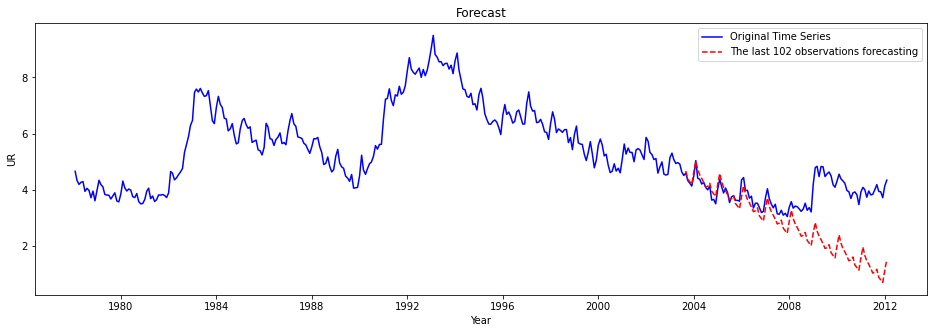

In [ ]:
plt.figure(figsize = (16,5))
plt.title('Forecast')
plt.plot(time_series,'b-',label="Original Time Series")
plt.plot(y_forecast_add_hw,'r-',label="The last 102 observations forecasting",linestyle="dashed")
plt.xlabel('Year')
plt.ylabel('UR')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

MSE_hw = mean_squared_error(time_series[-102:], y_forecast_add_hw)

print('MSE for Additive Holt-Winters is {}'.format(MSE_hw))

MSE for Additive Holt-Winters is 2.5154246674319705


In [ ]:
train_ratio_hw_log = 0.75
split_point_hw_log = round(len(time_series_log)*train_ratio_hw_log)

train_hw_log, test_hw_log = time_series_log[0:split_point_hw_log],time_series_log[split_point_hw_log:]

In [ ]:
train_hw_log

DATE
1978-02-01    1.538389
1978-03-01    1.467283
1978-04-01    1.433177
1978-05-01    1.450969
1978-06-01    1.456441
                ...   
2003-04-01    1.596496
2003-05-01    1.602959
2003-06-01    1.592114
2003-07-01    1.533124
2003-08-01    1.506198
Freq: MS, Name: UnemploymentRate, Length: 307, dtype: float64

In [ ]:
test_hw_log

DATE
2003-09-01    1.525239
2003-10-01    1.464812
2003-11-01    1.443826
2003-12-01    1.418732
2004-01-01    1.503166
                ...   
2011-10-01    1.371837
2011-11-01    1.367509
2011-12-01    1.313121
2012-01-01    1.419890
2012-02-01    1.468413
Freq: MS, Name: UnemploymentRate, Length: 102, dtype: float64

In [ ]:
fit_add_hw_log = ExponentialSmoothing(train_hw_log, seasonal_periods=12, trend='add', seasonal='add').fit() # Holt-Winters additive smoothing
fit_mul_hw_log = ExponentialSmoothing(train_hw_log, seasonal_periods=12, trend='add', seasonal='mul').fit() # Holt-Winters multiplicative smoothing

In [ ]:
# symbol r $ and \ in the results variable are the latex symbols for visualization in notebook
results_hw_log = pd.DataFrame(index=[r"$\alpha$",\
                              r"$\beta$",\
                              r"$\gamma$",\
                              r"$l_0$",\
                              "$b_0$",\
                              "SSE"])
# ExponentialSmoothing() object has following attributes
params_hw_log = ['smoothing_level', \
          'smoothing_trend', \
          'smoothing_seasonal', \
          'initial_level', \
          'initial_trend']

# check out the performance of additive and multiplicative
results_hw_log["Additive"]       = [fit_add_hw_log.params[p] for p in params] + [fit_add_hw_log.sse]
results_hw_log["Multiplicative"] = [fit_mul_hw_log.params[p] for p in params] + [fit_mul_hw_log.sse]
print(results_hw_log)

          Additive  Multiplicative
$\alpha$  0.668487        0.729747
$\beta$   0.214271        0.163967
$\gamma$  0.000000        0.000000
$l_0$     1.851197        1.862415
$b_0$     0.000000        0.000000
SSE       0.365365        0.397757


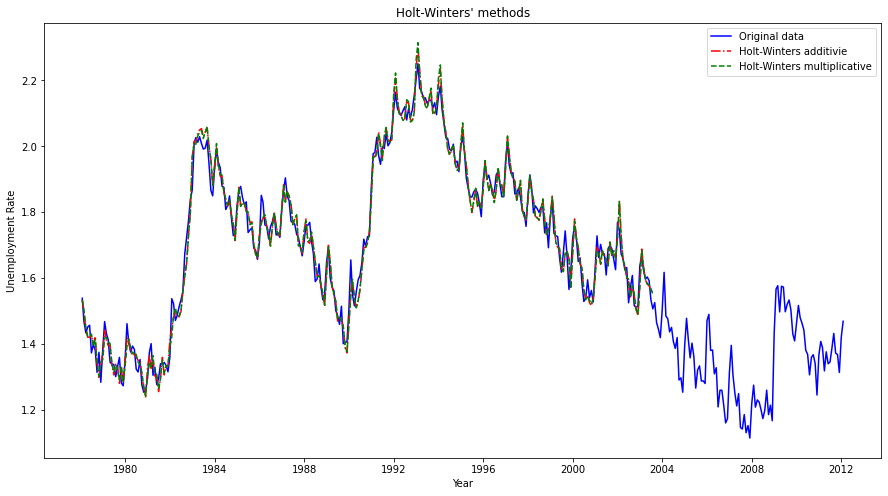

In [ ]:
# Obtain fitted values from the fittedvalues attribute
smooth_add_hw_log = fit_add_hw_log.fittedvalues
smooth_mul_hw_log = fit_mul_hw_log.fittedvalues

# Plot all together
plt.figure(figsize=(15,8))
plt.plot(time_series_log, 'b-', label = 'Original data')
plt.plot(smooth_add_hw_log, 'r-.',label = 'Holt-Winters additivie')
plt.plot(smooth_mul_hw_log, 'g--', label = 'Holt-Winters multiplicative')
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.title("Holt-Winters' methods")
plt.legend()
plt.show()

In [ ]:
print(smooth_add_hw_log)

DATE
1978-02-01    1.533023
1978-03-01    1.496397
1978-04-01    1.444375
1978-05-01    1.420036
1978-06-01    1.420190
                ...   
2003-04-01    1.595189
2003-05-01    1.581234
2003-06-01    1.575938
2003-07-01    1.564052
2003-08-01    1.554081
Freq: MS, Length: 307, dtype: float64


In [ ]:
# Forecast 12 more data points
y_forecast_add_hw_log = fit_add_hw_log.forecast(102)

In [ ]:
y_forecast_add_hw_log

2003-09-01    1.539240
2003-10-01    1.486385
2003-11-01    1.465917
2003-12-01    1.446036
2004-01-01    1.520459
                ...   
2011-10-01    0.637595
2011-11-01    0.617128
2011-12-01    0.597246
2012-01-01    0.671669
2012-02-01    0.734627
Freq: MS, Length: 102, dtype: float64

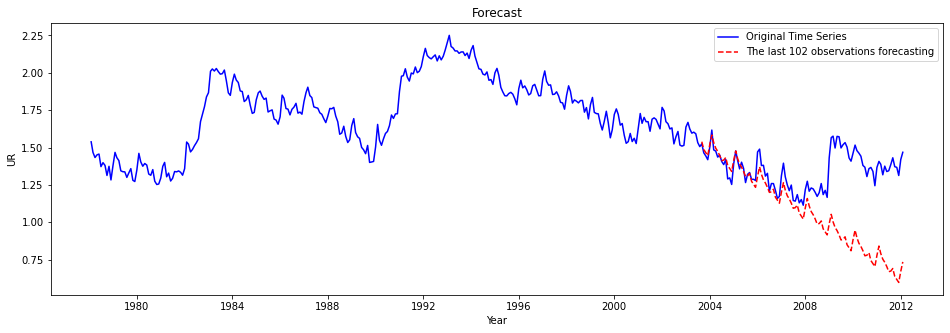

In [ ]:
plt.figure(figsize = (16,5))
plt.title('Forecast')
plt.plot(time_series_log,'b-',label="Original Time Series")
plt.plot(y_forecast_add_hw_log,'r-',label="The last 102 observations forecasting",linestyle="dashed")
plt.xlabel('Year')
plt.ylabel('UR')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

MSE_hw_log = mean_squared_error(time_series_log[-102:], y_forecast_add_hw_log)

print('MSE for Additive Holt-Winters is {}'.format(MSE_hw_log))

MSE for Additive Holt-Winters is 0.15031147817392923


# Seasonal ARIMA 

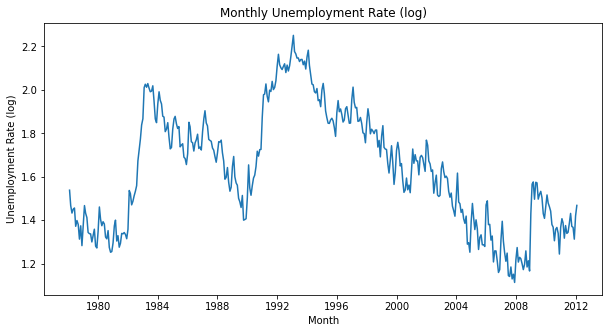

In [ ]:
time_series_log = np.log(time_series)

# Plot the time series
plt.figure(figsize=(10,5))
plt.plot(time_series_log)
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (log)')
plt.title("Monthly Unemployment Rate (log)")
plt.show()

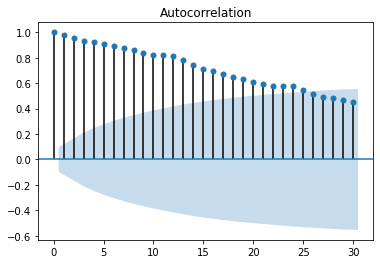

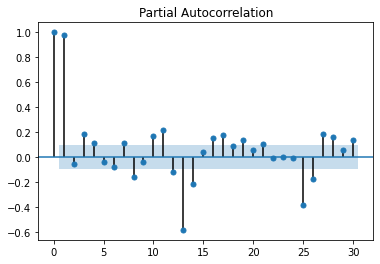

In [ ]:
smt.graphics.tsa.plot_acf(time_series_log, lags=30, alpha = 0.05)
plt.show()

smt.graphics.tsa.plot_pacf(time_series_log, lags=30, alpha = 0.05)
plt.show()

We find time series is not stationary

first order difference

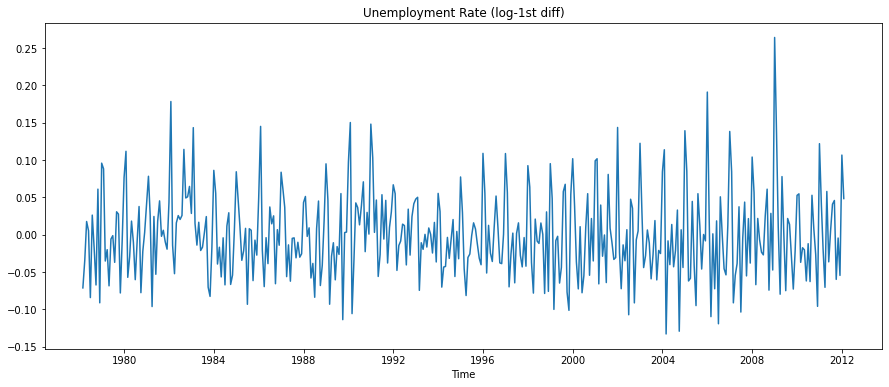

In [ ]:
time_series_log_diff = time_series_log - time_series_log.shift()
time_series_log_diff.dropna(inplace=True)

# Plot the 1st-differencing series
plt.figure(figsize = (15,6))
plt.plot(time_series_log_diff)
plt.title("Unemployment Rate (log-1st diff)")
plt.xlabel('Time')
plt.show()

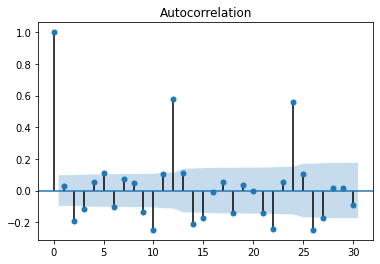

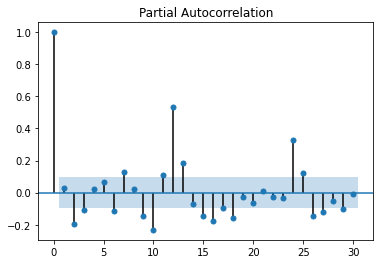

In [ ]:
smt.graphics.tsa.plot_acf(time_series_log_diff, lags=30, alpha = 0.05)
plt.show()

smt.graphics.tsa.plot_pacf(time_series_log_diff, lags=30, alpha = 0.05)
plt.show()

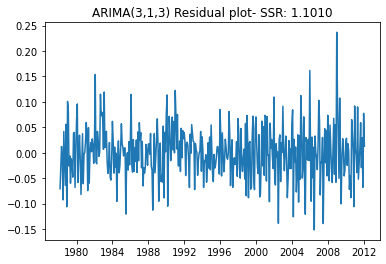

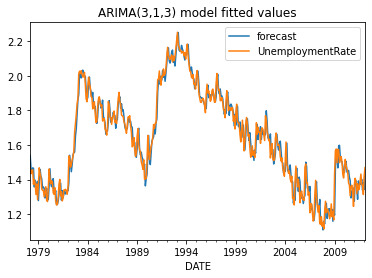

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# Create an ARIMA (3,1,3) model
model_DO = ARIMA(time_series_log, order=(3,1,3))
results_AR = model_DO.fit(disp=-1)
residuals = pd.DataFrame(results_AR.resid)

# Plot residual and calculate sum of squared residual (SSR)
plt.figure()
plt.plot(residuals)
plt.title('ARIMA(3,1,3) Residual plot- SSR: %.4f'% sum((results_AR.resid.values)**2))
plt.show()

# Get Fitted Series
fitted = results_AR.predict(typ = 'levels', dynamic = False)

# Actual vs Fitted
results_AR.plot_predict(dynamic=False)
plt.title("ARIMA(3,1,3) model fitted values")
plt.show()

In [ ]:
# Define train/test split ratio
train_ratio = 0.75

# In-sample size
split_point = round(len(time_series_log)*train_ratio)

# Train/test split
training, testing = time_series_log[0:split_point], time_series_log[split_point:] 

# Define a SARIMAX model
model_DO = SARIMAX(training, 
                order = (3,1,3),                 # Non-seasonal component
                seasonal_order = (10,0,0,12),     # Seasonal component
                enforce_stationarity = False,
                enforce_invertibility = False)

# Fit the SARIMAX model on in-sample data
model_DO_fit = model_DO.fit(disp=-1)

# Forecast
forecast_DO = model_DO_fit.forecast(len(testing))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


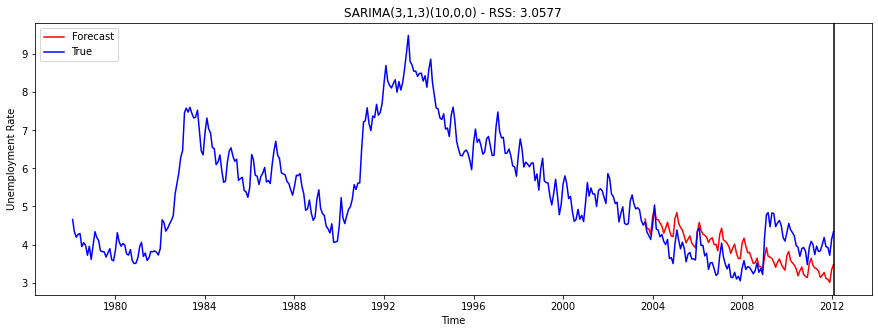

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(np.exp(forecast_DO),'r',label='Forecast')
plt.plot(np.exp(time_series_log),'b',label='True')
plt.title('SARIMA(3,1,3)(10,0,0) - RSS: %.4f'%sum((model_DO_fit.resid.values)**2))
plt.xlabel("Time")
plt.ylabel("Unemployment Rate")
plt.legend()
plt.axvline(x=time_series_log.index[-1],color='black')  # Make a vertical line indicating train/test separation
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(np.exp(testing),np.exp(forecast_DO))
print("MSE for SARIMA(3,1,3)(10,0,0,12) is {}".format(MSE))

MSE for SARIMA(3,1,3)(10,0,0,12) is 0.3667692414125513


In [ ]:
# Define a SARIMAX model
model_DO_predict = SARIMAX(time_series_log, 
                order = (3,1,3),                 # Non-seasonal component
                seasonal_order = (10,0,0,12),     # Seasonal component
                enforce_stationarity = False,
                enforce_invertibility = False)

# Fit the SARIMAX model on in-sample data
model_DO_predict_fit = model_DO_predict.fit(disp=-1)

# Forecast
forecast_DO_predict = model_DO_predict_fit.forecast(48)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


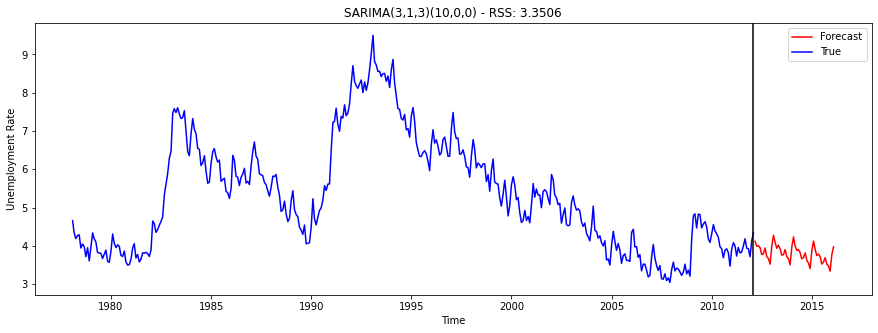

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(np.exp(forecast_DO_predict),'r',label='Forecast')
plt.plot(np.exp(time_series_log),'b',label='True')
plt.title('SARIMA(3,1,3)(10,0,0) - RSS: %.4f'%sum((model_DO_predict_fit.resid.values)**2))
plt.xlabel("Time")
plt.ylabel("Unemployment Rate")
plt.legend()
plt.axvline(x=time_series_log.index[-1],color='black')  # Make a vertical line indicating train/test separation
plt.show()

# Using aic to find p,q 

In [ ]:
%%time

import statsmodels.tsa.stattools as st 

order = st.arma_order_select_ic(time_series_log_diff,max_ar=7,max_ma=7,ic=['aic'])
print(order.aic_min_order)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist

(4, 7)
CPU times: user 6min 7s, sys: 3min 49s, total: 9min 57s
Wall time: 5min 42s


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p=5 d=1 q=7

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


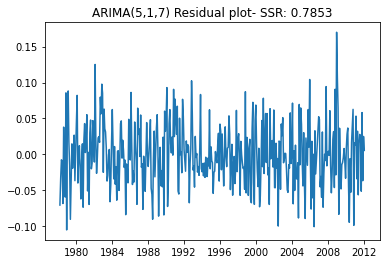

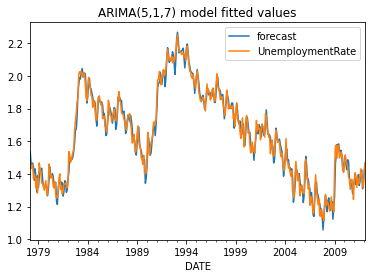

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# Create an ARIMA (5,1,7) model
model_AIC = ARIMA(time_series_log, order=(5, 1, 7))
results_AR = model_AIC.fit(disp=-1)
residuals = pd.DataFrame(results_AR.resid)

# Plot residual and calculate sum of squared residual (SSR)
plt.figure()
plt.plot(residuals)
plt.title('ARIMA(5,1,7) Residual plot- SSR: %.4f'% sum((results_AR.resid.values)**2))
plt.show()

# Get Fitted Series
fitted = results_AR.predict(typ = 'levels', dynamic = False)

# Actual vs Fitted
results_AR.plot_predict(dynamic=False)
plt.title("ARIMA(5,1,7) model fitted values")
plt.show()

m  is equal to the ACF lag with the highest value (typically at a high lag).
D=1  if the series has a stable seasonal pattern over time.
D=0  if the series has an unstable seasonal pattern over time.
P≥1  if the PACF is positive at lag  m , else  P=0 .
Q≥1  if the ACF is negative at lag  m , else  Q=0 .



SARIMA(5,1,7)(1,0,0) S=12 Final Model



In [ ]:
# Define train/test split ratio
train_ratio = 0.75

# In-sample size
split_point = round(len(time_series_log)*train_ratio)

# Train/test split
training, testing = time_series_log[0:split_point], time_series_log[split_point:] 

# Define a SARIMAX model
model_AIC = SARIMAX(training, 
                order = (5,1,7),                 # Non-seasonal component
                seasonal_order = (10,0,0,12),     # Seasonal component
                enforce_stationarity = False,
                enforce_invertibility = False)

# Fit the SARIMAX model on in-sample data
model_AIC_predict_fit = model_AIC.fit(disp=-1)

# Forecast
forecast_AIC = model_AIC_predict_fit.forecast(len(testing))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


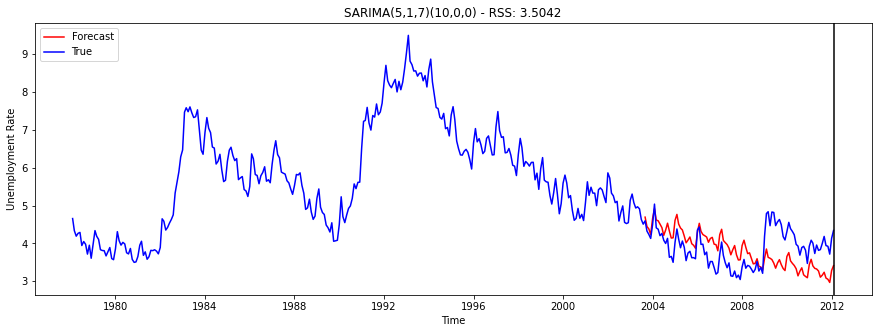

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(np.exp(forecast_AIC),'r',label='Forecast')
plt.plot(np.exp(time_series_log),'b',label='True')
plt.title('SARIMA(5,1,7)(10,0,0) - RSS: %.4f'%sum((model_AIC_predict_fit.resid.values)**2))
plt.xlabel("Time")
plt.ylabel("Unemployment Rate")
plt.legend()
plt.axvline(x=time_series_log.index[-1],color='black')  # Make a vertical line indicating train/test separation
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(np.exp(testing),np.exp(forecast_AIC))
print("MSE for SARIMA(5,1,7)(10,0,0,12) is {}".format(MSE))
    

MSE for SARIMA(5,1,7)(10,0,0,12) is 0.36889315225812225


In [ ]:
# Define a SARIMAX model
model = SARIMAX(time_series_log, 
                order = (5,1,7),                 # Non-seasonal component
                seasonal_order = (10,0,0,12),     # Seasonal component
                enforce_stationarity = False,
                enforce_invertibility = False)

# Fit the SARIMAX model on in-sample data
model_fit = model.fit(disp=-1)

# Forecast
forecast_final_model = model_fit.forecast(48)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


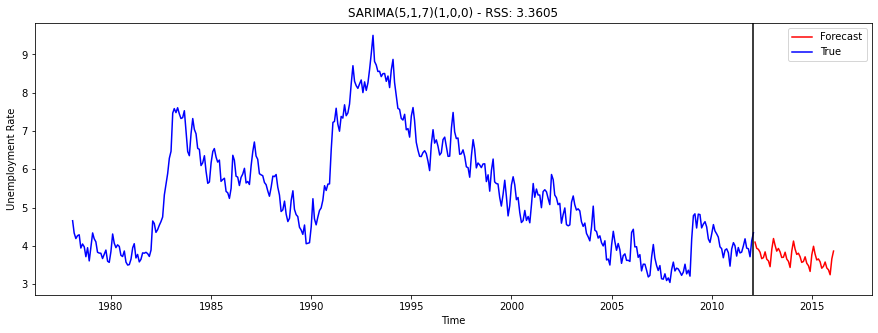

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(np.exp(forecast_final_model),'r',label='Forecast')
plt.plot(np.exp(time_series_log),'b',label='True')
plt.title('SARIMA(5,1,7)(1,0,0) - RSS: %.4f'%sum((model_fit.resid.values)**2))
plt.xlabel("Time")
plt.ylabel("Unemployment Rate")
plt.legend()
plt.axvline(x=time_series_log.index[-1],color='black')  # Make a vertical line indicating train/test separation
plt.show()

# Testing d=2

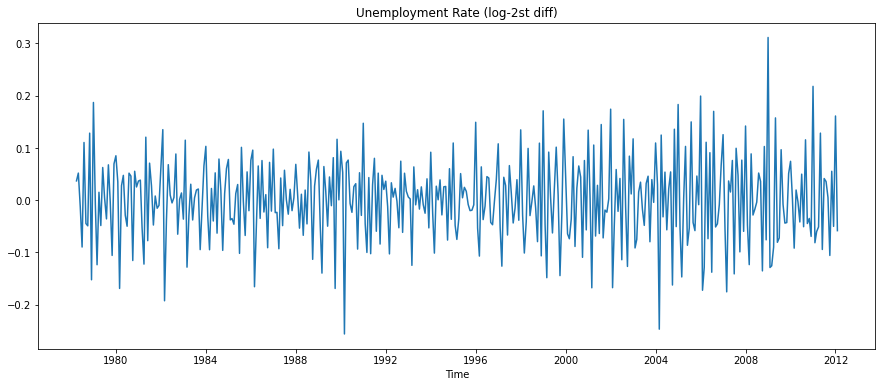

In [ ]:
time_series_log_diff_2 = time_series_log_diff - time_series_log_diff.shift()
time_series_log_diff_2.dropna(inplace=True)

# Plot the 2st-differencing series
plt.figure(figsize = (15,6))
plt.plot(time_series_log_diff_2)
plt.title("Unemployment Rate (log-2st diff)")
plt.xlabel('Time')
plt.show()

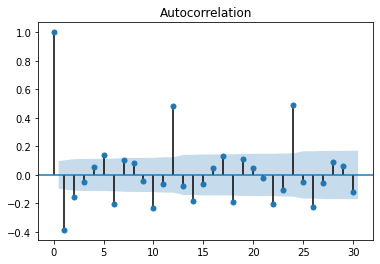

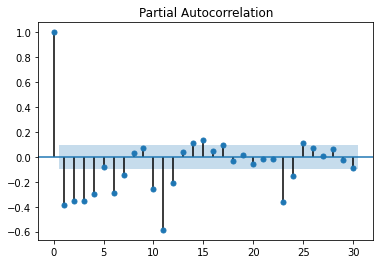

In [ ]:
smt.graphics.tsa.plot_acf(time_series_log_diff_2, lags=30, alpha = 0.05)
plt.show()

smt.graphics.tsa.plot_pacf(time_series_log_diff_2, lags=30, alpha = 0.05)
plt.show()

In [ ]:
import statsmodels.tsa.stattools as st 

order = st.arma_order_select_ic(time_series_log_diff_2,max_ar=5,max_ma=5,ic=['aic'])
print(order.aic_min_order)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/pyt

(2, 3)


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 p=5, q=3

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


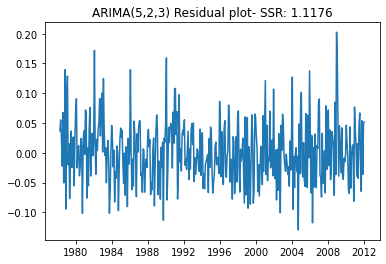

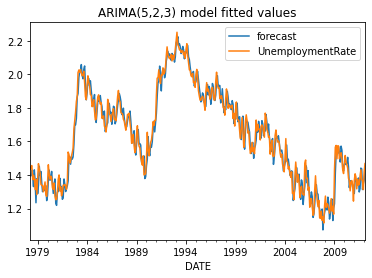

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# Create an ARIMA (5,2,3) model
model = ARIMA(time_series_log, order=(5, 2, 3))
results_AR = model.fit(disp=-1)
residuals = pd.DataFrame(results_AR.resid)

# Plot residual and calculate sum of squared residual (SSR)
plt.figure()
plt.plot(residuals)
plt.title('ARIMA(5,2,3) Residual plot- SSR: %.4f'% sum((results_AR.resid.values)**2))
plt.show()

# Get Fitted Series
fitted = results_AR.predict(typ = 'levels', dynamic = False)

# Actual vs Fitted
results_AR.plot_predict(dynamic=False)
plt.title("ARIMA(5,2,3) model fitted values")
plt.show()

In [ ]:
# Define a SARIMAX model
model = SARIMAX(time_series_log, 
                order = (5,2,3),                 # Non-seasonal component
                seasonal_order = (0,0,0,12),     # Seasonal component
                enforce_stationarity = False,
                enforce_invertibility = False)

# Fit the SARIMAX model on in-sample data
model_fit = model.fit(disp=-1)

# Forecast
forecast = model_fit.forecast(48)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


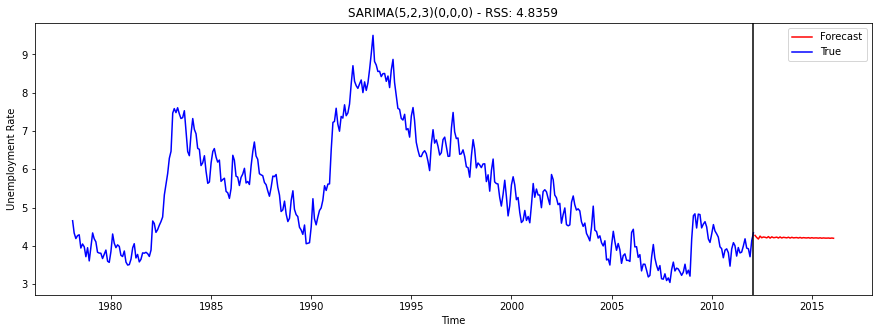

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(np.exp(forecast),'r',label='Forecast')
plt.plot(np.exp(time_series_log),'b',label='True')
plt.title('SARIMA(5,2,3)(0,0,0) - RSS: %.4f'%sum((model_fit.resid.values)**2))
plt.xlabel("Time")
plt.ylabel("Unemployment Rate")
plt.legend()
plt.axvline(x=time_series_log.index[-1],color='black')  # Make a vertical line indicating train/test separation
plt.show()

# Neaural Network 

toturial 11,12

In [ ]:
import os
os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES']=""
os.environ['TF_CUDNN_USE_AUTOTUNE'] ='0'

import numpy as np
import tensorflow as tf
import random

np.random.seed(0)
tf.random.set_seed(0)
random.seed(0)

import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [ ]:
data_not_scaled = pd.read_csv('Unemployment_Rate_train.csv',usecols=[1])
data_not_scaled = data_not_scaled.dropna()        # Drop all Nans
data_not_scaled = data_not_scaled.values          # Convert from DataFrame to Python Array
data_not_scaled = data_not_scaled.astype('float') # You need to make sure the data is type of float

In [ ]:
data_test = pd.read_csv('Unemployment_Rate_test.csv',usecols=[1])

In [ ]:
data_not_scaled = np.concatenate((data_not_scaled,data_test))

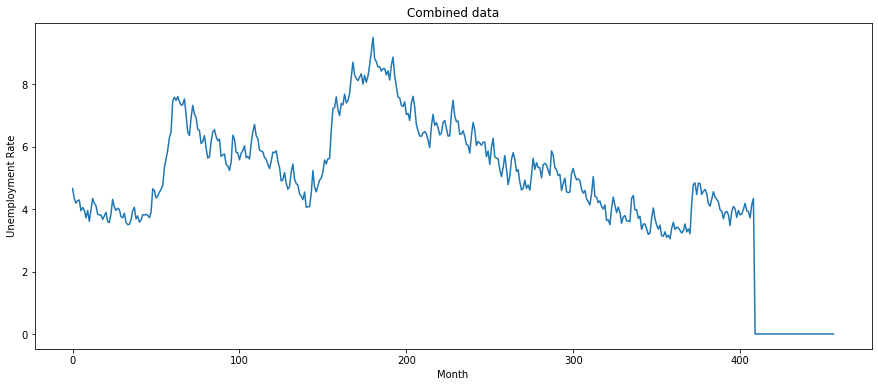

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(data_not_scaled)
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.title('Combined data')
plt.show()

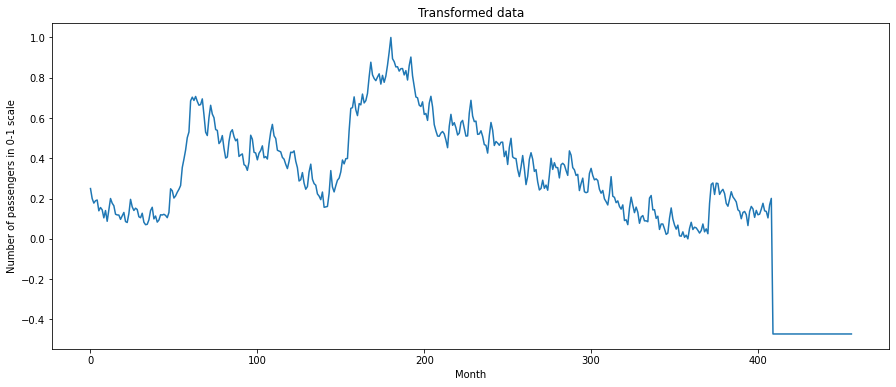

In [ ]:
# Time window to define the number of features in each row
time_window = 12

# Define a scaler object
scaler = MinMaxScaler(feature_range=(0, 1))

# Compute in-sample and out-of-sample size
train_size = int(409-time_window)
test_size = 457 - train_size-time_window

# Fitting the scaler
fitted_transformer = scaler.fit(data_not_scaled[:train_size+time_window])

# Transforming using trained scaler
data = fitted_transformer.transform(data_not_scaled)

# Plot the scaled data
plt.figure(figsize=(15,6))
plt.plot(data)
plt.xlabel('Month')
plt.ylabel('Number of passengers in 0-1 scale')
plt.title('Transformed data')
plt.show()

In [ ]:
# Pre-allocation
Xall, Yall = [], []
Xall_not_scaled, Yall_not_scaled = [], []

# Use each rolling window as a row in the data matrix 
for i in range(time_window, len(data)):
    Xall.append(data[i-time_window:i, 0])
    Xall_not_scaled.append(data_not_scaled[i-time_window:i, 0])
    Yall.append(data[i, 0])
    Yall_not_scaled.append(data_not_scaled[i, 0])

# Convert them from list to array
Xall = np.array(Xall)
Yall = np.array(Yall)
Xall_not_scaled = np.array(Xall_not_scaled)
Yall_not_scaled = np.array(Yall_not_scaled)

# Training data
Xtrain = Xall[:train_size, :]
Ytrain = Yall[:train_size]

# Test data
Xtest = Xall[-test_size:, :]
Ytest = Yall[-test_size:]

In [ ]:
# For time series and LSTM layer we need to reshape into 3D array
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], time_window, 1))
Xtest = np.reshape(Xtest, (Xtest.shape[0], time_window, 1))

model = Sequential()
# Add a LSTM with units (number of hidden neurons) = 24
# input_dim = 1 (for time series)
# return sequences = False (default) means the RNN layer will only return the last hidden state output

model.add(LSTM(input_shape = (None,1), 
               units = 10, 
               activation = 'relu', 
               return_sequences = False)) 
model.add(Dense(units=6))
model.add(Activation("relu"))
model.compile(loss="mse", optimizer="adagrad")

In [ ]:
from keras.callbacks import EarlyStopping 

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [ ]:
model.fit(Xtrain, Ytrain, 
          batch_size = 5,             
          epochs = 300,               
          validation_split = 0.1, 
          shuffle = False,
          verbose = 0, 
          callbacks = [early_stop])



Epoch 00046: early stopping


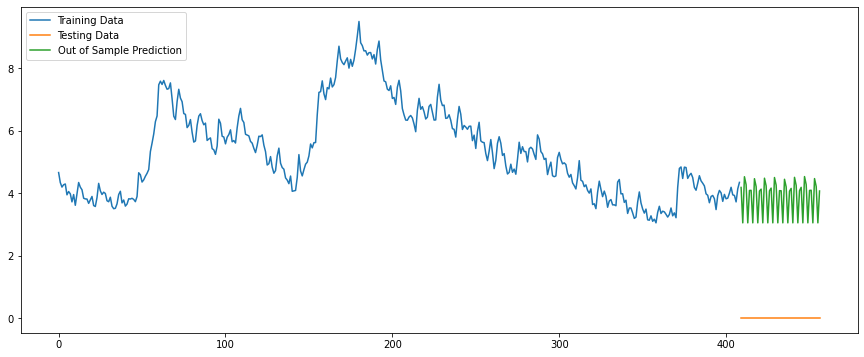

TEST MSE: 15.051351114416624


In [ ]:
#Dynamical Prediction
dynamic_prediction = np.copy(data[:len(data) - test_size])

for i in range(len(data) - test_size, len(data)):
    last_feature = np.reshape(dynamic_prediction[i-time_window:i], (1,time_window,1))
    next_pred = model.predict(last_feature)
    dynamic_prediction = np.append(dynamic_prediction, next_pred)

# Transform forecast values to original scale
dynamic_prediction = dynamic_prediction.reshape(-1,1)
dynamic_prediction_original_scale = scaler.inverse_transform(dynamic_prediction)

# Plot
test_index = np.arange(len(data) - test_size, len(data), 1)

plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(data[:len(data) - test_size]), label='Training Data')
plt.plot(test_index, scaler.inverse_transform(data[-test_size:]), label='Testing Data')
plt.plot(test_index, dynamic_prediction_original_scale[-test_size:], label='Out of Sample Prediction') 
plt.legend(loc = "upper left")
plt.show()

# Compute MSE score on test data
testScore = mean_squared_error(scaler.inverse_transform(data[-test_size:]), dynamic_prediction_original_scale[-test_size:])
print('TEST MSE: {0}'.format(testScore))


## Final results

In [ ]:
rnn = []
for i in dynamic_prediction_original_scale[-test_size:]:
  rnn.append(i[0])

In [ ]:
sarima = forecast_final_model
hw = y_forecast_add

In [109]:
results = pd.DataFrame(data = {'Date' : sarima.index,'Holt-Winter':hw,'SARIMA':np.exp(sarima.values),"RNN+LSTM":rnn})

In [110]:
results.head()

,Date,Holt-Winter,SARIMA,RNN+LSTM
2012-03-01,2012-03-01,4.109920,4.098790,4.180383
2012-04-01,2012-04-01,3.927114,3.936994,3.046317
2012-05-01,2012-05-01,3.841416,3.911567,4.523434
2012-06-01,2012-06-01,3.718631,3.834424,4.268053
2012-07-01,2012-07-01,3.544279,3.667448,3.046317


Final Model SARIMA

In [ ]:
print(np.exp(sarima))

In [ ]:
test_error = mean_squared_error(unemployment_rate_test['UnemploymentRate'],np.exp(forecast_final_model))

In [ ]:
print(test_error)

13.84907449439128


In [104]:
print(np.exp(forecast_final_model))

2012-03-01    4.098790
2012-04-01    3.936994
2012-05-01    3.911567
2012-06-01    3.834424
2012-07-01    3.667448
2012-08-01    3.693863
2012-09-01    3.844502
2012-10-01    3.652773
2012-11-01    3.608491
2012-12-01    3.458291
2013-01-01    3.912350
2013-02-01    4.192466
2013-03-01    4.020181
2013-04-01    3.863917
2013-05-01    3.934359
2013-06-01    3.844987
2013-07-01    3.697879
2013-08-01    3.704461
2013-09-01    3.835354
2013-10-01    3.656913
2013-11-01    3.595614
2013-12-01    3.437245
2014-01-01    3.871027
2014-02-01    4.126600
2014-03-01    3.921840
2014-04-01    3.778355
2014-05-01    3.809675
2014-06-01    3.718402
2014-07-01    3.569751
2014-08-01    3.593745
2014-09-01    3.715389
2014-10-01    3.546321
2014-11-01    3.482812
2014-12-01    3.334088
2015-01-01    3.769301
2015-02-01    3.990166
2015-03-01    3.790462
2015-04-01    3.633515
2015-05-01    3.659853
2015-06-01    3.586455
2015-07-01    3.416999
2015-08-01    3.465889
2015-09-01    3.579803
2015-10-01 

In [108]:
# data_predict=np.exp(forecast_final_model)
# data_predict.to_csv(r'/content/QBUS6840 predict.csv',index = False)
